$$
\newcommand{\mat}[1]{\boldsymbol {#1}}
\newcommand{\mattr}[1]{\boldsymbol {#1}^\top}
\newcommand{\matinv}[1]{\boldsymbol {#1}^{-1}}
\newcommand{\vec}[1]{\boldsymbol {#1}}
\newcommand{\vectr}[1]{\boldsymbol {#1}^\top}
\newcommand{\rvar}[1]{\mathrm {#1}}
\newcommand{\rvec}[1]{\boldsymbol{\mathrm{#1}}}
\newcommand{\diag}{\mathop{\mathrm {diag}}}
\newcommand{\set}[1]{\mathbb {#1}}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\pderiv}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\bb}[1]{\boldsymbol{#1}}
$$
# Part 6: YOLO - Objects Detection
<a id=part6></a>

In this part we will use an object detection architecture called YOLO (You only look once) to detect objects in images. We'll use an already trained model weights (v5) found here: https://github.com/ultralytics/yolov5

In [1]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Load the YOLO model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")
model.to(device)
# Images
img1 = 'imgs/DolphinsInTheSky.jpg'  
img2 = 'imgs/cat-shiba-inu-2.jpg' 

Using cache found in /home/omri/.cache/torch/hub/ultralytics_yolov5_master


YOLOv5 🚀 2024-7-17 Python-3.8.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA TITAN Xp, 12190MiB)



Fusing layers... 


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs


Adding AutoShape... 


## Inference with YOLO
<a id=part6_1></a>

You are provided with 2 images (img1 and img2).
**TODO**:
1. Detect objects using the YOLOv5 model for these 2 images.
2. Print the inference output with bounding boxes.
3. Look at the inference results and answer the question below.


WARNING ⚠️ NMS time limit 0.550s exceeded


image 1/1: 183x275 2 persons, 1 surfboard
Speed: 116.3ms pre-process, 173.1ms inference, 1507.6ms NMS per image at shape (1, 3, 448, 640)


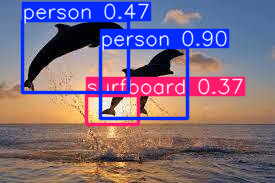

image 1/1: 750x750 2 cats, 1 dog
Speed: 76.7ms pre-process, 126.0ms inference, 2.2ms NMS per image at shape (1, 3, 640, 640)


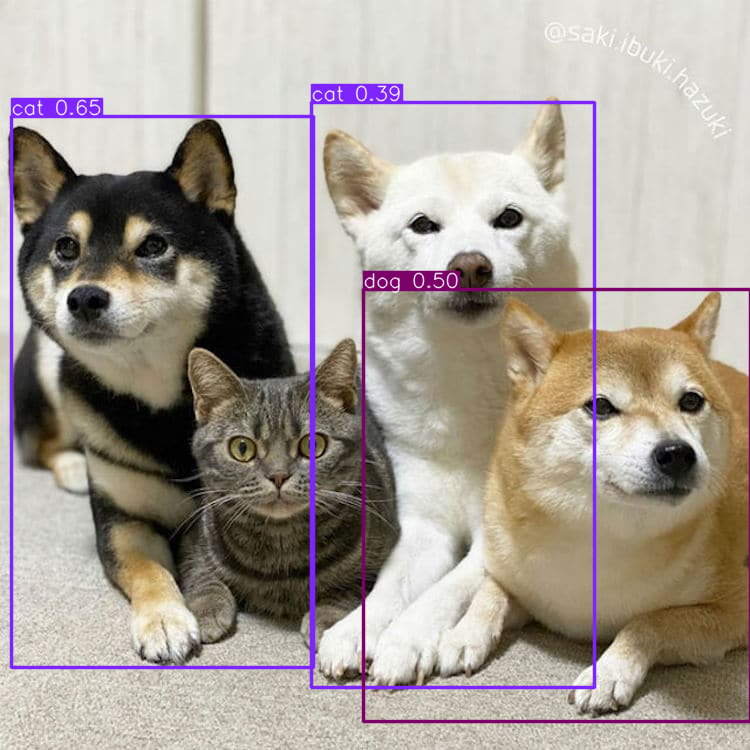

In [2]:
# Perform inference
with torch.no_grad():
    results = [model(img1), model(img2)]
    for result in results:
        result.print()
        result.show()


### Question 1

Analyze the inference results of the 2 images. 
1. How well did the model detect the objects in the pictures? with what confidance?
2. What can possibly be the reason for the model failures? suggest methods to resolve that issue.
3. recall that we learned how to fool a model by adverserial attack (PGD), describe how you would attack an Object Detection model (such as YOLO).

In [3]:
from cs236781.answers import display_answer
import hw2.answers
display_answer(hw2.answers.part6_q1)



1.
The model detection rate was not high in those particular images. Although there were some detections, they were mostly of the wrong label. This is probrably due to overlapping objects that alter the spatiality of the image, making the model mistakenly predict object. We can also notice that even when the object were detects, which is not always the case as we can see in the second image (the cat in the middle is not detected as an object at all), the detection is for the wrong label. Another factor to show us that the model did not succeed so well is the confidence rate, aside from one with a confidence of 90% (on a mislabled dolphin), all other were between 35% and 65% which is considerably low.

2.
A main reason for the model to fail is as we said due to the overlapping in the images. It alters the spatialty of the images and causes them to differ greatly from images the model has seen and has been trained on before. 
Lets take a better look at the first image detection and infer reasons of failure from it. Firstly, dolphins are rarely out of the water, this angle of image with the sun in the back may be similar to a large amount of images it has been trained on that aren't dolphins. We can assume that the model would have been able to detect the dolphins if they were in the water, as this is a more common image to train on. Secondly, we see that the detections were of a human and a surfboard, which are much more common with the sky and waves and this is probrably the reason it detected the dolphins as persons and a surfboard.
We can suggest a few things in order to better the detection rate in our opinion. We can train the model on more of these images, the more we add similar images the dataset the more it is likely to be detected correctly. Another option is to manipulate the image and "cut" it to fit less of the environment and more of just the object, making it focus more on the object itself.

3.
To attack a YOLO object detection model using Projected Gradient Descent (PGD), you start with the original image and iteratively adjust it to increase the model's loss, causing it to make incorrect predictions. This involves computing the loss gradient and updating the image within a given limit. After several iterations, you evaluate the adversarial image to check if it causes the model to misdetect or misclassify, revealing the model's vulnerabilities and helping to develop robust defenses.



## Creative Detection Failures

<a id=part6_2></a>

Object detection pitfalls could be, for example: **occlusion** - when the objects are partially occlude, and thus missing important features, **model bias** - when a model learn some bias about an object, it could recognize it as something else in a different setup, and many others like **Deformation**, **Illumination conditions**, **Cluttered** or **textured background and blurring** due to moving objects.

**TODO**: Take pictures and that demonstrates 3 of the above object detection pitfalls, run inference and analyze the results.

image 1/1: 186x271 11 dogs, 2 teddy bears
Speed: 34.2ms pre-process, 9.8ms inference, 1.9ms NMS per image at shape (1, 3, 448, 640)


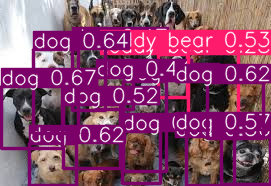

image 1/1: 834x850 1 person
Speed: 22.9ms pre-process, 9.9ms inference, 1.8ms NMS per image at shape (1, 3, 640, 640)


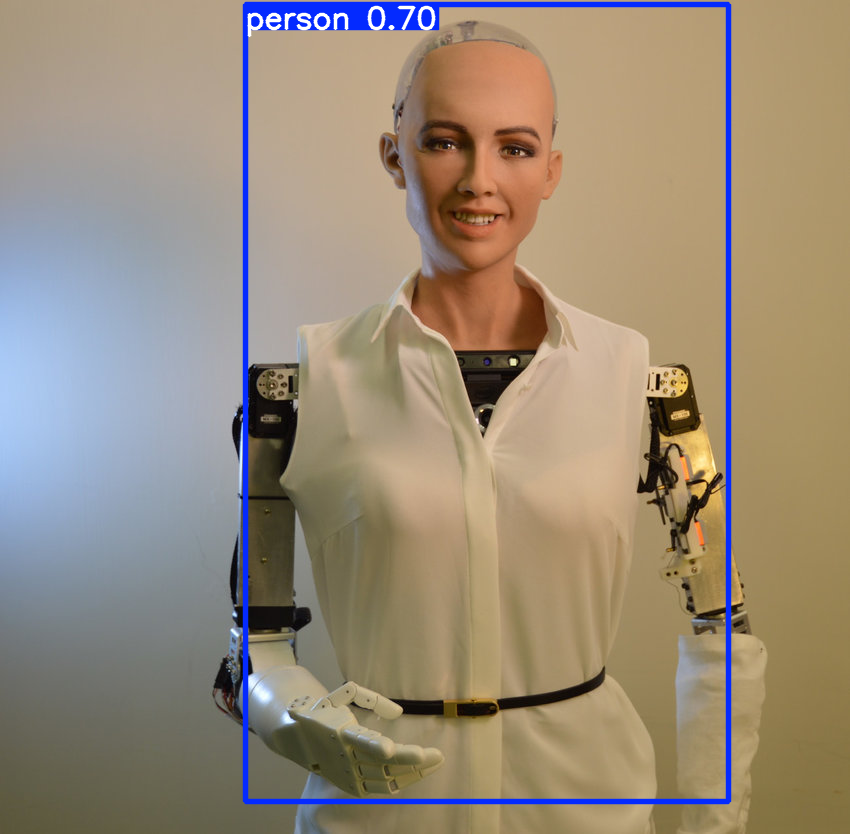

image 1/1: 684x1024 2 persons, 1 train, 1 traffic light
Speed: 41.9ms pre-process, 9.3ms inference, 1.7ms NMS per image at shape (1, 3, 448, 640)


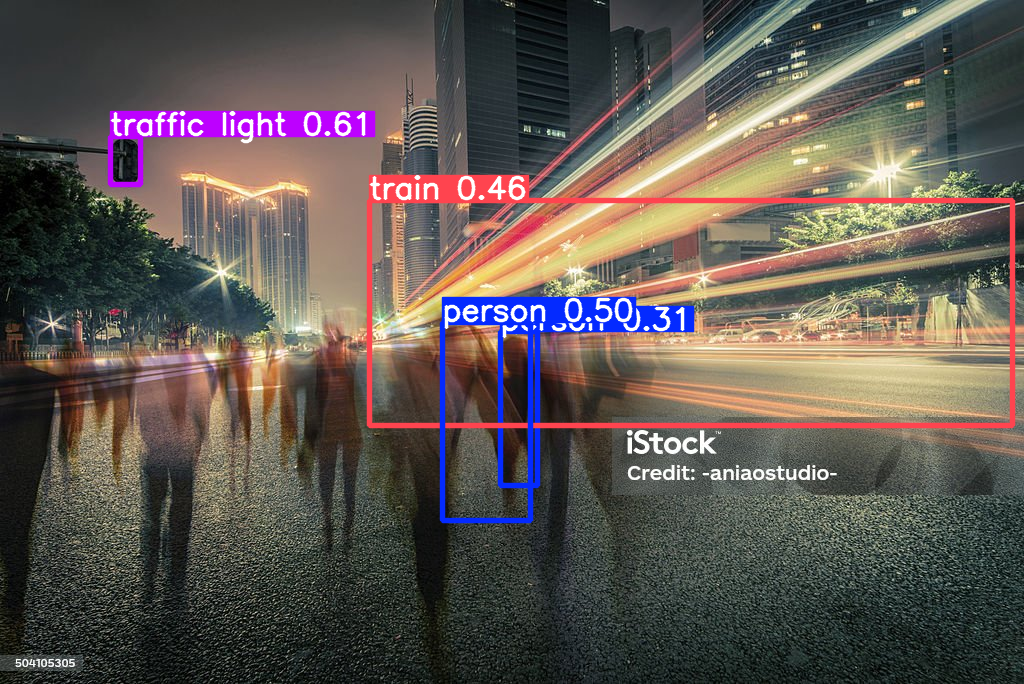

In [4]:
#Insert the inference code here.
ocllusion = 'imgs/Occlusion2_example.jpg'  
bias = 'imgs/Model_bias2.png' 
blurry = 'imgs/Blurry2_example.jpg'
with torch.no_grad():
    results_pitfall = [model(ocllusion), model(bias), model(blurry)]
    for result in results_pitfall:
        result.print()
        result.show()


### Question 3

Analyize the results of the inference. 
1. How well did the model detect the objects in the pictures? explain.


In [5]:
display_answer(hw2.answers.part6_q3)




We chose to demostrate Occlusion, Model Bias and Textured Background and Blurring pit falls.

*Occlusion:*

The picture we chose is a picture of a pack of dogs sitting next to and behind each other. We can clearly see the effects of occlusion here, the dogs in the front are detected with a good enough confidence, whilst the dogs in the back are either wrongfully detected or not detected at all. We can also see that the bounding box of those in the front is much more precise meaning it was able to detect those dogs that weren't occluded better.

*Model bias:*

The picture we chose is a picture of a humanoid robot called sophia.
The robot clearly has some non human aspects: the bald head with metal at its top and the robotic arms and chest.
We can guss that the model detects the robot as a person as this is a very humanoid robot so there are a lot of features that are similar to human.Additionaly, we assume that another reason is that there aren't many images of robots in the dataset, at least not as much as persons that causes the bias.

*Textured Background and Blurring:*

The picture we chose shows the effect of blurring very well, object the were static during the capture of the image, like the traffic light, are not blurry and are very well detected. Whereas object that were moving are detected poorly or not detected at all. We can assume that the persons that were moving slightly during the capture are the ones that eventually got detected and the ones that moved a lot are those who weren't detected at all.



## Bonus 
<a id=part6_3></a>

Try improving the model performance over poorly recognized images by changing them. 
Describe the manipulations you did to the pictures.

image 1/1: 256x256 (no detections)
Speed: 9.1ms pre-process, 8.9ms inference, 1.1ms NMS per image at shape (1, 3, 640, 640)


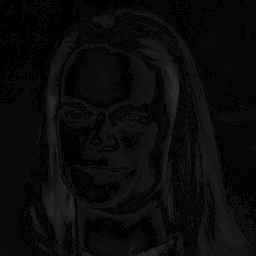

image 1/1: 256x256 (no detections)
Speed: 3.4ms pre-process, 8.1ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


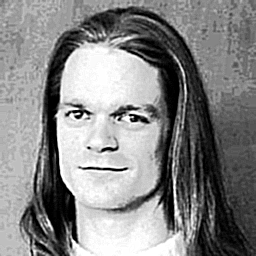

image 1/1: 256x256 1 person
Speed: 3.5ms pre-process, 8.4ms inference, 1.7ms NMS per image at shape (1, 3, 640, 640)


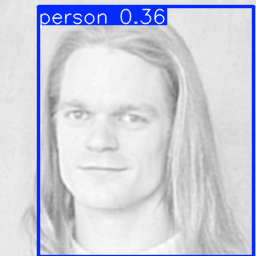

In [6]:
#insert bonus code here
import cv2
import numpy as np
low_contrast = 'imgs/low_contrast_example4.png'

first_enhancment = cv2.imread(low_contrast, cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
first_enhancment = cv2.equalizeHist(first_enhancment)

# Optionally apply additional filters, e.g., Gaussian blur
first_enhancment = cv2.GaussianBlur(first_enhancment, (5, 5), 0)

# Sharpen the image
sharpening_kernel = np.array([[-1, -1, -1], 
                              [-1, 9, -1],
                              [-1, -1, -1]])
first_enhancment = cv2.filter2D(first_enhancment, -1, sharpening_kernel)

second_enhancment = cv2.imread(low_contrast, cv2.IMREAD_GRAYSCALE)

# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(second_enhancment)

# Optionally apply additional filters, e.g., Gaussian blur
blurred_clahe_image = cv2.GaussianBlur(clahe_image, (5, 5), 0)

# More aggressive sharpening
aggressive_sharpening_kernel = np.array([[-1, -1, -1, -1, -1], 
                                         [-1, 2, 2, 2, -1],
                                         [-1, 2, 8, 2, -1],
                                         [-1, 2, 2, 2, -1],
                                         [-1, -1, -1, -1, -1]]) / 8.0
second_enhancment = cv2.filter2D(blurred_clahe_image, -1, aggressive_sharpening_kernel)



with torch.no_grad():
    results_low_contrast = model(low_contrast)
    results_low_contrast.print()
    results_low_contrast.show()

    results_first_enhanced = model(first_enhancment)
    results_first_enhanced.print()
    results_first_enhanced.show()
    
    results_second_enhanced = model(second_enhancment)
    results_second_enhanced.print()
    results_second_enhanced.show()


In [7]:
display_answer(hw2.answers.part6_bonus)



The image we chose to perform the enhancment on is a picture with an extermly low contrast of a person. 
Firstly, we displayed the original image, it it very dificult even for a human eye to detect that this is a person, and the model stuglled to detect an object at all, let alone a correct detection of a human.
Secondly, We tried to enhance the contrast of the image using tools learned in EE's course - Images Proccesing and Analysis (046200) and used an image sharpening method using histogram equalization, adding gaussian blur and finally using a sharpening kernal. We can see that this already increased the contrast massively, yet the model still hasn't detected any objects in the image.
Finally, we used a method called Contrast Limited Adaptive Histogram Equalization (CLAHE), as well as a more aggressive sharpenning kernel in order to achieve better overall contrast.
We can see that after performing this method we indeed got a detection, and a detection of a person as it should be.

